In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

In [18]:
# load turnstile data
ts_df = pd.read_csv("turnstile daily entries w income.csv")

# check that import ran
ts_df.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,ID,BOROUGH,LAT,LON,ZIP,RICH_INDEX
0,0,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0,613.0,M,40.762593,-73.967613,10155.0,NaN
1,1,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0,613.0,M,40.762593,-73.967613,10155.0,NaN
2,2,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0,613.0,M,40.762593,-73.967613,10155.0,NaN
3,3,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0,613.0,M,40.762593,-73.967613,10155.0,NaN
4,4,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0,613.0,M,40.762593,-73.967613,10155.0,NaN


In [19]:
# num of days
n_days = len(ts_df['DATE'].unique())
print("The number of dates in the dataset is", n_days)

# aggregate turnstile entries by station and days
station_date = ts_df.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index()

# num of day-station combinations
n_obs = len(station_date)
print("The number of day-station combinations is", n_obs)

The number of dates in the dataset is 41
The number of day-station combinations is 15506


count      379.000000
mean      3646.754617
std       4027.620415
min          0.000000
25%       1332.500000
50%       2261.000000
75%       4439.500000
max      28839.000000
Name: Entries, dtype: float64

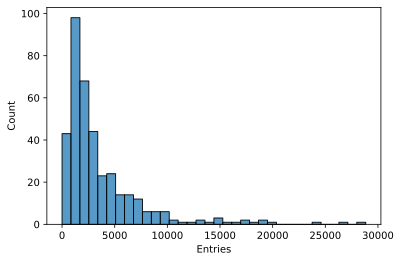

In [20]:
# plot histogram of daily entries
# median is taken to account for outliers in daily entries for each station
# image is clipped using screencapture for presentation
plot_riders = station_date.groupby('STATION')['DAILY_ENTRIES'].median().reset_index()
plot_riders.columns = ['STATION','Entries']
entries_hist = sns.histplot(plot_riders['Entries']);

# present summary statistics
# note that count represents total number of stations
plot_riders.Entries.describe()

count    166.000000
mean       0.127370
std        0.101306
min        0.014966
25%        0.027702
50%        0.126915
75%        0.172355
max        0.476064
Name: High-Income Index, dtype: float64

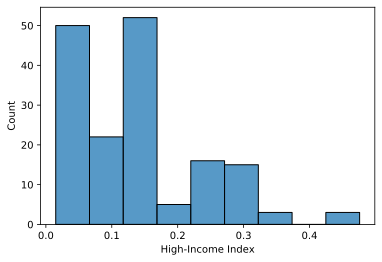

In [23]:
# plot histogram of high-income index for each station
# image is clipped using screencapture for presentation

plot_inc = ts_df.groupby(['STATION'])['RICH_INDEX'].max().reset_index()

plot_inc.columns = ['STATION','High-Income Index']

sns.histplot(plot_inc['High-Income Index'])

# present summary statistics
# note that 166 represents the non-missing values of High Income Index
plot_inc['High-Income Index'].describe()

In [26]:
station_df = ts_df.groupby(['STATION',])[['DAILY_ENTRIES','RICH_INDEX']].agg({'DAILY_ENTRIES':'sum','RICH_INDEX':'max'}).reset_index()

top_inc = station_df.copy().sort_values(by='RICH_INDEX',ascending=False).iloc[:10]
# top_inc['FLAG_INC'] = 1
top_rider = station_df.copy().sort_values(by='DAILY_ENTRIES',ascending=False).iloc[:10]
# top_rider['FLAG_RIDER'] = 1

top_inc_rider = top_rider.merge(top_inc,on=["STATION",'DAILY_ENTRIES','RICH_INDEX'],how='outer',indicator=True)
top_inc_rider = top_inc_rider.rename(columns={'_merge':'RANKTYPE'})
top_inc_rider['RANKTYPE']=top_inc_rider['RANKTYPE'].str.replace('left_only','Top 10 Rider',regex=False)
top_inc_rider['RANKTYPE']=top_inc_rider['RANKTYPE'].str.replace('right_only','Top 10 Income',regex=False)
top_inc_rider['RANKTYPE']=top_inc_rider['RANKTYPE'].str.title()

# top_inc_rider = top_inc_rider.sort_values(by=['RANKTYPE','DAILY_ENTRIES'],ascending=[True,False])
flagged_df = station_df.merge(top_inc_rider,on=['STATION','DAILY_ENTRIES','RICH_INDEX'],how='left',indicator=True)
flagged_df.loc[flagged_df['RANKTYPE'].isna(),'RANKTYPE'] = "None"
flagged_df = flagged_df.drop(columns="_merge")

flagged_df.columns=['STATION','Entries','High-Income Index', "Category"]

# Present Top 10 Stations by Ridership and High-Income Index
flagged_df[flagged_df['Category']!="None"].sort_values(by=['Entries','High-Income Index'],ascending=False)

,STATION,Entries,High-Income Index,Category
61,34 ST-PENN STA,10684004.0,NaN,Top 10 Rider
46,23 ST,8007608.0,0.282516,Top 10 Rider
233,GRD CNTRL-42 ST,7716165.0,NaN,Top 10 Rider
68,42 ST-PORT AUTH,7146268.0,0.167883,Top 10 Rider
59,34 ST-HERALD SQ,6745862.0,NaN,Top 10 Rider
353,TIMES SQ-42 ST,6122971.0,0.167883,Top 10 Rider
110,86 ST,5965970.0,0.309399,Both
226,FULTON ST,5682895.0,NaN,Top 10 Rider
14,14 ST-UNION SQ,5634468.0,0.247352,Top 10 Rider
173,CANAL ST,5245331.0,0.274382,Top 10 Rider


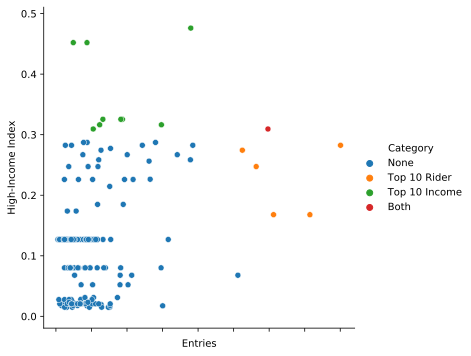

In [174]:
# Investigate relationship between ridership and income level
relplt = sns.relplot(x="Entries",y="High-Income Index",hue='Category',data=flagged_df)

relplt.set(xticklabels=[])

In [176]:
# Save the figure for presentation as .svg
relplt.savefig('rich_entries scatter.svg')